# ***Implementing Translational, Rotational, Shearing, Scaling, Reflection for 3D***

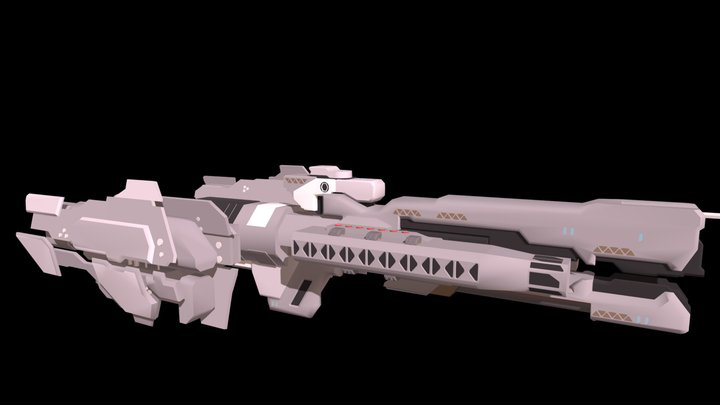

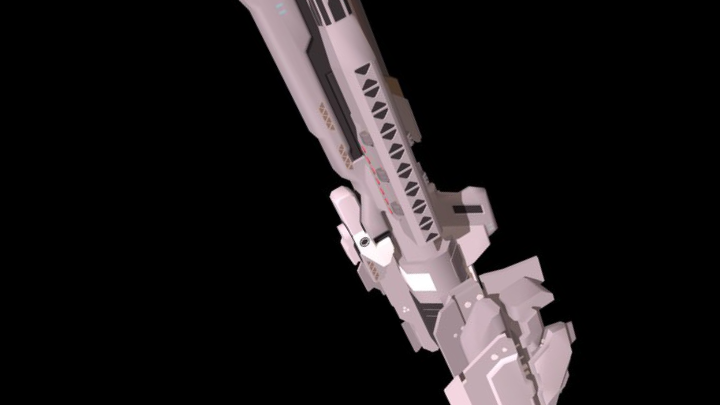

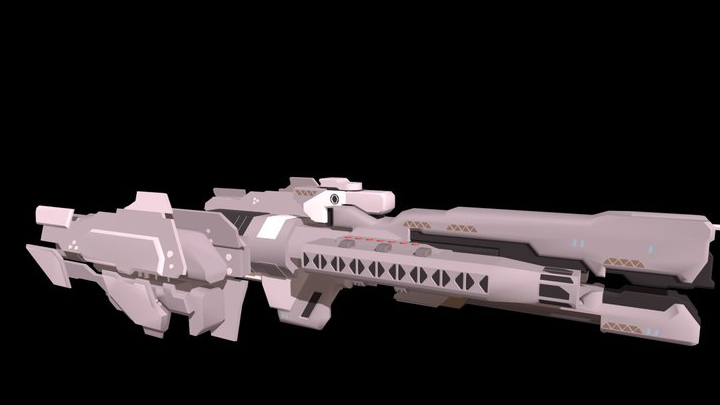

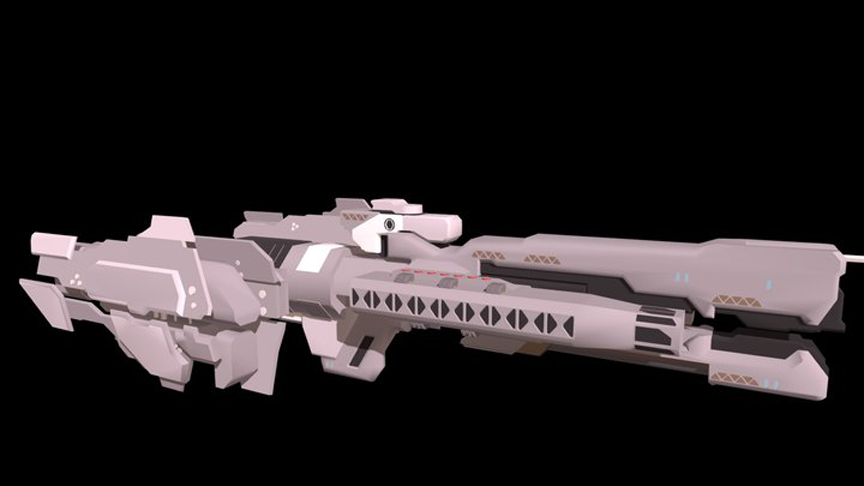

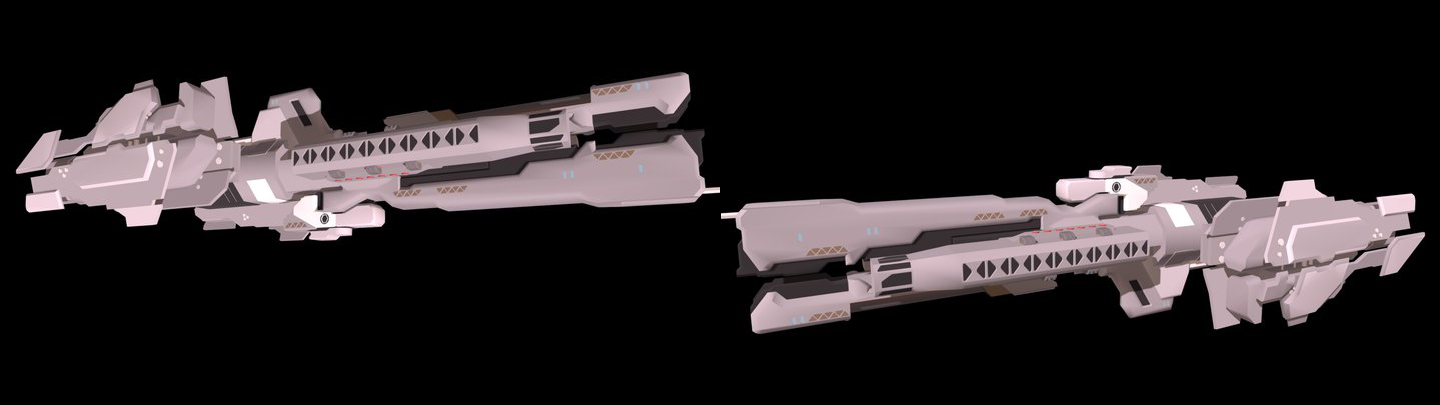

Reflection On X - axis 			  Reflection On Y - axis


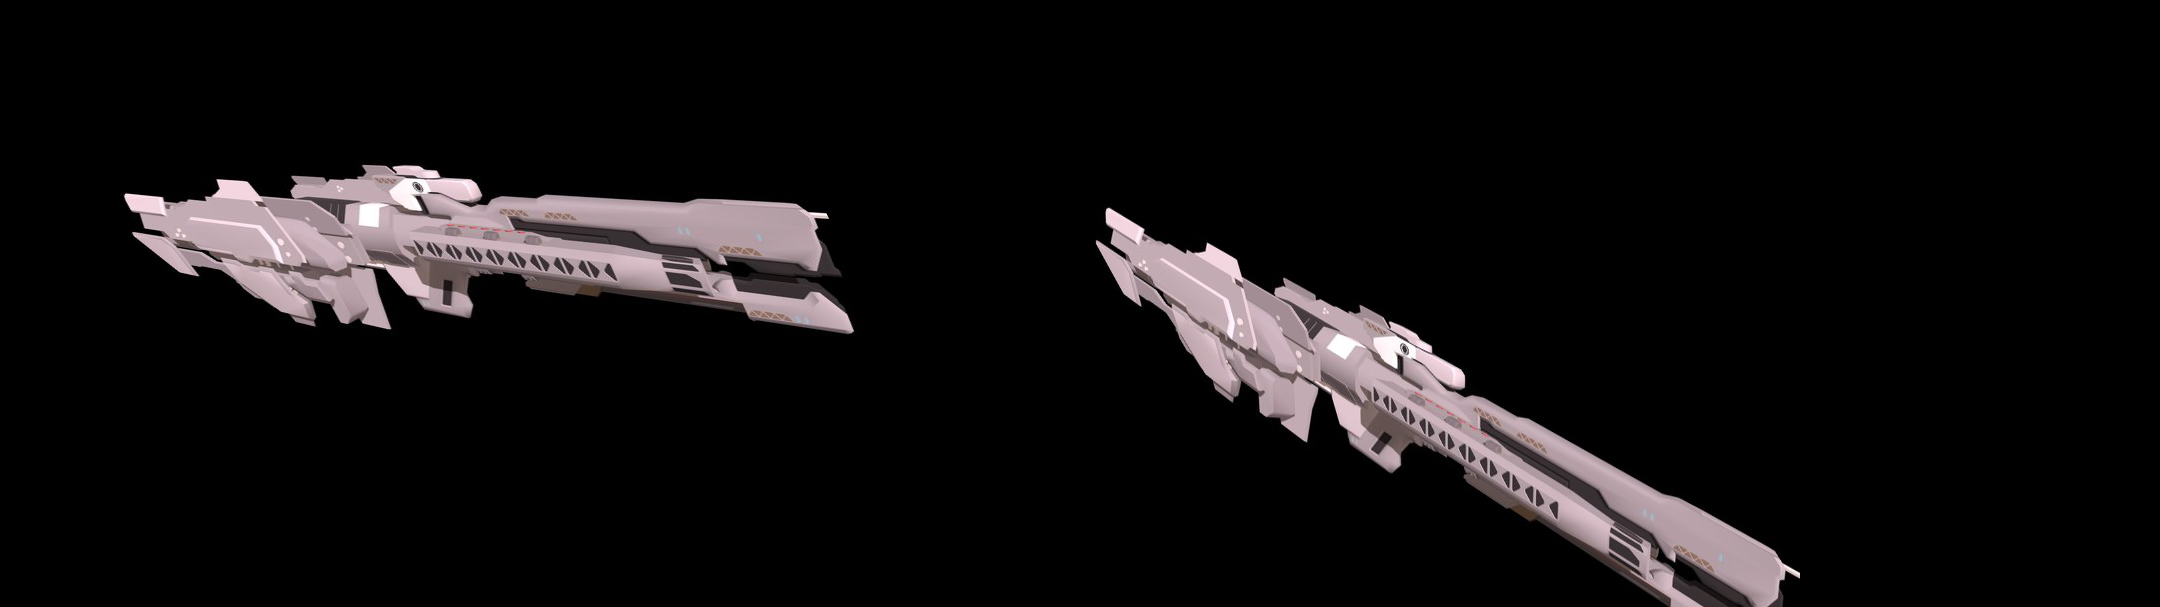

Shearing On X - axis 					   Shearing On Y - axis


In [ ]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow
import numpy as np

img = io.imread('https://media.sketchfab.com/models/aa26039fca994ad89137a789e9ea0dd5/thumbnails/6bcfc0d1795f4e67bea4d9507d412381/1fc0c0d05fb14e5b9d6acf7e0e7cd436.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2_imshow(img)

rows, cols, dim = img.shape
center = (cols/2, rows/2)
rotate_matrix = cv2.getRotationMatrix2D(center = center, angle = 120, scale = 1)
rotated_img = cv2.warpAffine(src = img, M = rotate_matrix, dsize = (cols, rows))
cv2_imshow(rotated_img)

M = np.float32([[1,0,10], [0,1,12]])
translated_img = cv2.warpAffine(img, M, (cols,rows))
cv2_imshow(translated_img)

scale_percent = 120
dim = (int(img.shape[1] * scale_percent / 100), int(img.shape[0] * scale_percent / 100))
resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
cv2_imshow(resized_img)

Mx = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
My = np.float32([[-1, 0, cols], [0, 1, 0], [ 0, 0, 1]])
reflected_img_x = cv2.warpPerspective(img, Mx, (int(cols),int(rows)))
reflected_img_y = cv2.warpPerspective(img, My, (int(cols),int(rows)))
cv2_imshow(cv2.hconcat([reflected_img_x, reflected_img_y]))
print("Reflection On X - axis \t\t\t  Reflection On Y - axis")

Mx = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
My = np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])
sheared_img_x = cv2.warpPerspective(img , Mx, (int(cols*1.5), int(rows*1.5)))
sheared_img_y = cv2.warpPerspective(img , My, (int(cols*1.5), int(rows*1.5)))
cv2_imshow(cv2.hconcat([sheared_img_x, sheared_img_y]))
print("Shearing On X - axis \t\t\t\t\t   Shearing On Y - axis")
